In [ ]:
# Part 0: Mount Drive and load words
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/brown_nouns.txt"

# load nouns (lowercased, strip whitespace)
with open(file_path, "r", encoding="utf-8") as f:
    words = [line.strip().lower() for line in f if line.strip()]

noun_set = set(words)  # fast lookup
print(f"Loaded {len(words)} words. Example: {words[:10]}")

Mounted at /content/drive
Loaded 202793 words. Example: ['investigation', 'primary', 'election', 'evidence', 'irregularities', 'place', 'jury', 'presentments', 'charge', 'election']


In [ ]:
# Trie Node Class
class TrieNode:
    def __init__(self):
        self.children = {}
        self.freq = 0

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        node.freq += 1
        for ch in word:
            if ch not in node.children:
                node.children[ch] = TrieNode()
            node = node.children[ch]
            node.freq += 1

    def get_stem_suffix(self, word):
        node = self.root
        max_branch, split = -1, 0
        for i, ch in enumerate(word):
            if ch not in node.children: break
            node = node.children[ch]
            if len(node.children) > max_branch:
                max_branch, split = len(node.children), i+1
        return word[:split], word[split:]

In [ ]:
# Build prefix and suffix tries
prefix_trie = Trie()
suffix_trie = Trie()
for w in words:
    prefix_trie.insert(w)
    suffix_trie.insert(w[::-1])  # reversed word for suffix trie

# Test first 20 words
print("\nPrefix Trie Results:")
for w in words[:20]:
    stem, suffix = prefix_trie.get_stem_suffix(w)
    print(f"{w} = {stem}+{suffix}")

print("\nSuffix Trie Results:")
for w in words[:20]:
    rev_stem, rev_suffix = suffix_trie.get_stem_suffix(w[::-1])
    stem, suffix = w[:-len(rev_stem)] if rev_stem else w, w[-len(rev_stem):] if rev_stem else ""
    print(f"{w} = {stem}+{suffix}")


Prefix Trie Results:
investigation = in+vestigation
primary = p+rimary
election = e+lection
evidence = e+vidence
irregularities = i+rregularities
place = p+lace
jury = ju+ry
presentments = p+resentments
charge = c+harge
election = e+lection
praise = p+raise
thanks = t+hanks
manner = ma+nner
election = e+lection
term = t+erm
jury = ju+ry
reports = re+ports
irregularities = i+rregularities
primary = p+rimary
handful = ha+ndful

Suffix Trie Results:
investigation = investigati+on
primary = primar+y
election = electi+on
evidence = evidenc+e
irregularities = irregularitie+s
place = plac+e
jury = jur+y
presentments = presentment+s
charge = charg+e
election = electi+on
praise = prais+e
thanks = thank+s
manner = mann+er
election = electi+on
term = ter+m
jury = jur+y
reports = report+s
irregularities = irregularitie+s
primary = primar+y
handful = handfu+l


In [7]:
# Path to tokenized sentences
file_path = "/content/drive/MyDrive/tokenized_sentences.txt"

# Load sentences
with open(file_path, "r", encoding="utf-8") as f:
    tokenized_sentences = f.readlines()

print(f"✅ Total sentences loaded: {len(tokenized_sentences)}")
print("🔹 First 5 tokenized sentences:\n")
print(tokenized_sentences[:5])

✅ Total sentences loaded: 1020545
🔹 First 5 tokenized sentences:

['लोगों को बिलों संबंधी सुविधा देना ही उनका काम\n', 'इनेलो 1987 में उस वक्त ऐसे ही दोराहे पर खड़ी थी ,\n', 'जब पूर्व उपप्रधानमंत्री देवीलाल ने अपने पुत्र ओमप्रकाश चौटाला को अपना राजनीतिक उत्तराधिकारी घोषित किया था।\n', 'हालांकि तब पार्टी पर देवीलाल की मजबूत पकड़ के चलते पार्टी टूटने से बच गई थी।\n', '1989 में देवीलाल केन्द्र की राजनीति में सक्रिय हो गए थे और उनके उपप्रधानमंत्री बनने के पश्चात् उनके तीन बेटों जगदीश सिंह ,\n']


In [8]:
# Create word frequency dictionary manually
word_freq = {}

for line in tokenized_sentences:
    words = line.strip().split()
    for word in words:
        word_freq[word] = word_freq.get(word, 0) + 1

print(f"✅ Total unique words: {len(word_freq)}")

✅ Total unique words: 245959


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/

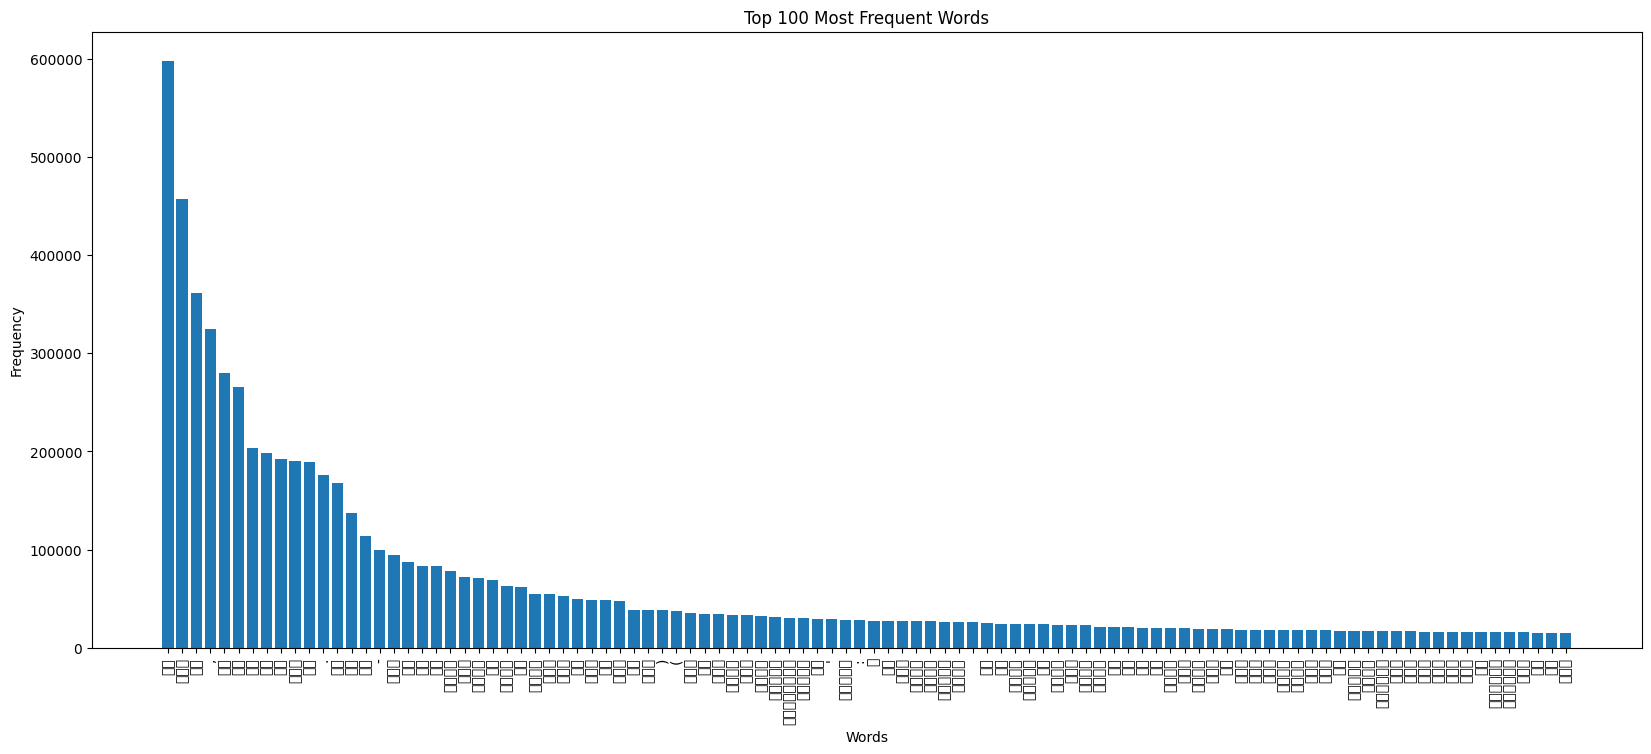

In [9]:
import matplotlib.pyplot as plt

# Sort words by frequency (descending order)
sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Take top 100 words
top_words = sorted_freq[:100]
words, freqs = zip(*top_words)

# Plot top 100 frequent words
plt.figure(figsize=(20, 8))
plt.bar(words, freqs)
plt.xticks(rotation=90)
plt.title("Top 100 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2343 (\N{DEVANAGARI LETTER DHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2337 (\N{DEVANAGARI LETTER DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2364 (\N{DEVANAGARI SIGN NUKTA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2330 (\N{DEVANAGARI LETTER CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2347 (\N{DEVANAGARI LETTER PHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

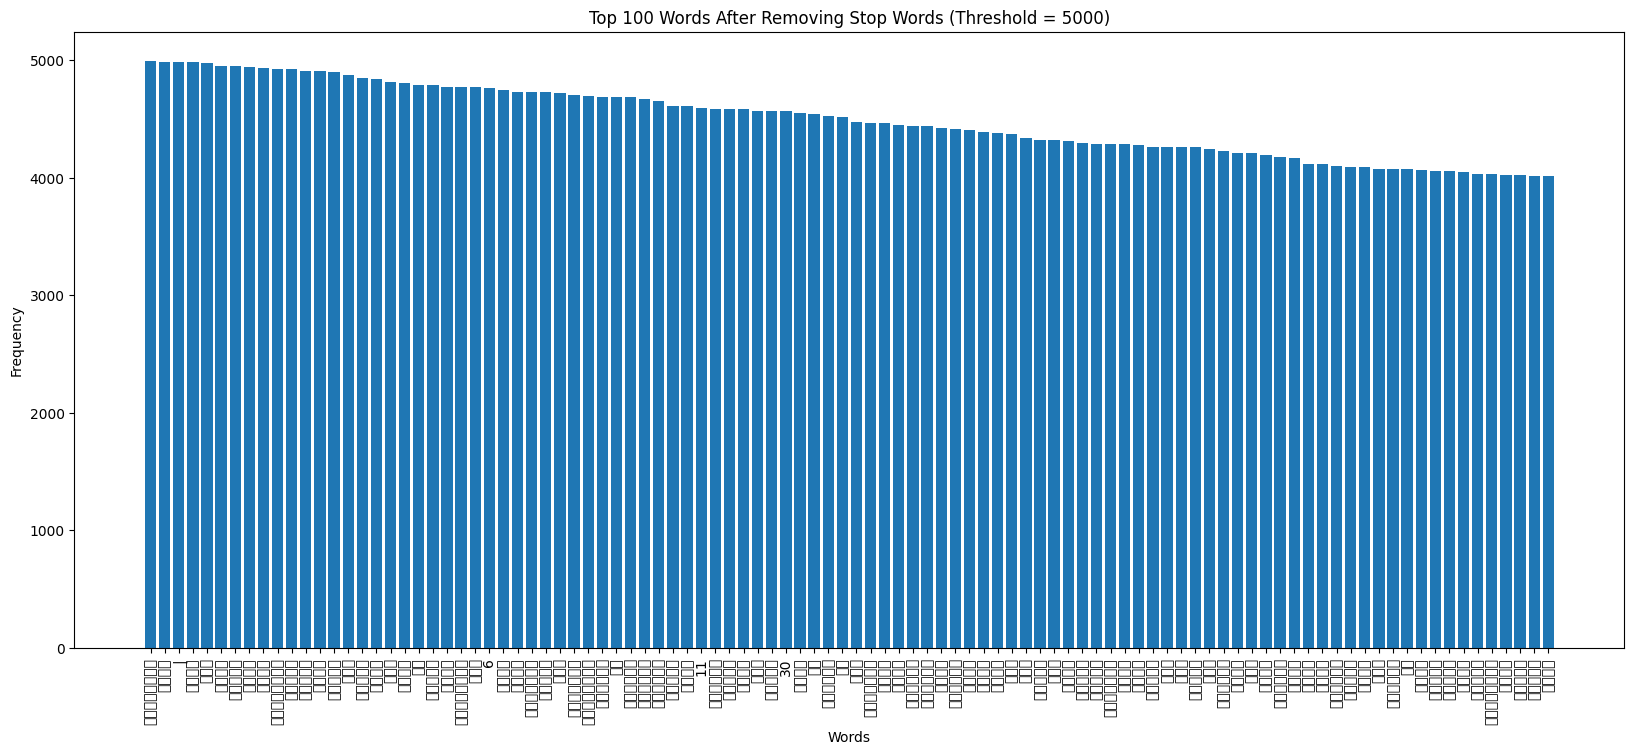

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2396 (\N{DEVANAGARI LETTER DDDHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2377 (\N{DEVANAGARI VOWEL SIGN CANDRA O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2335 (\N{DEVANAGARI LETTER TTA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2371 (\N{DEVANAGARI VOWEL SIGN VOCALIC R}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2328 (\N{DEVANAGARI LETTER GHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

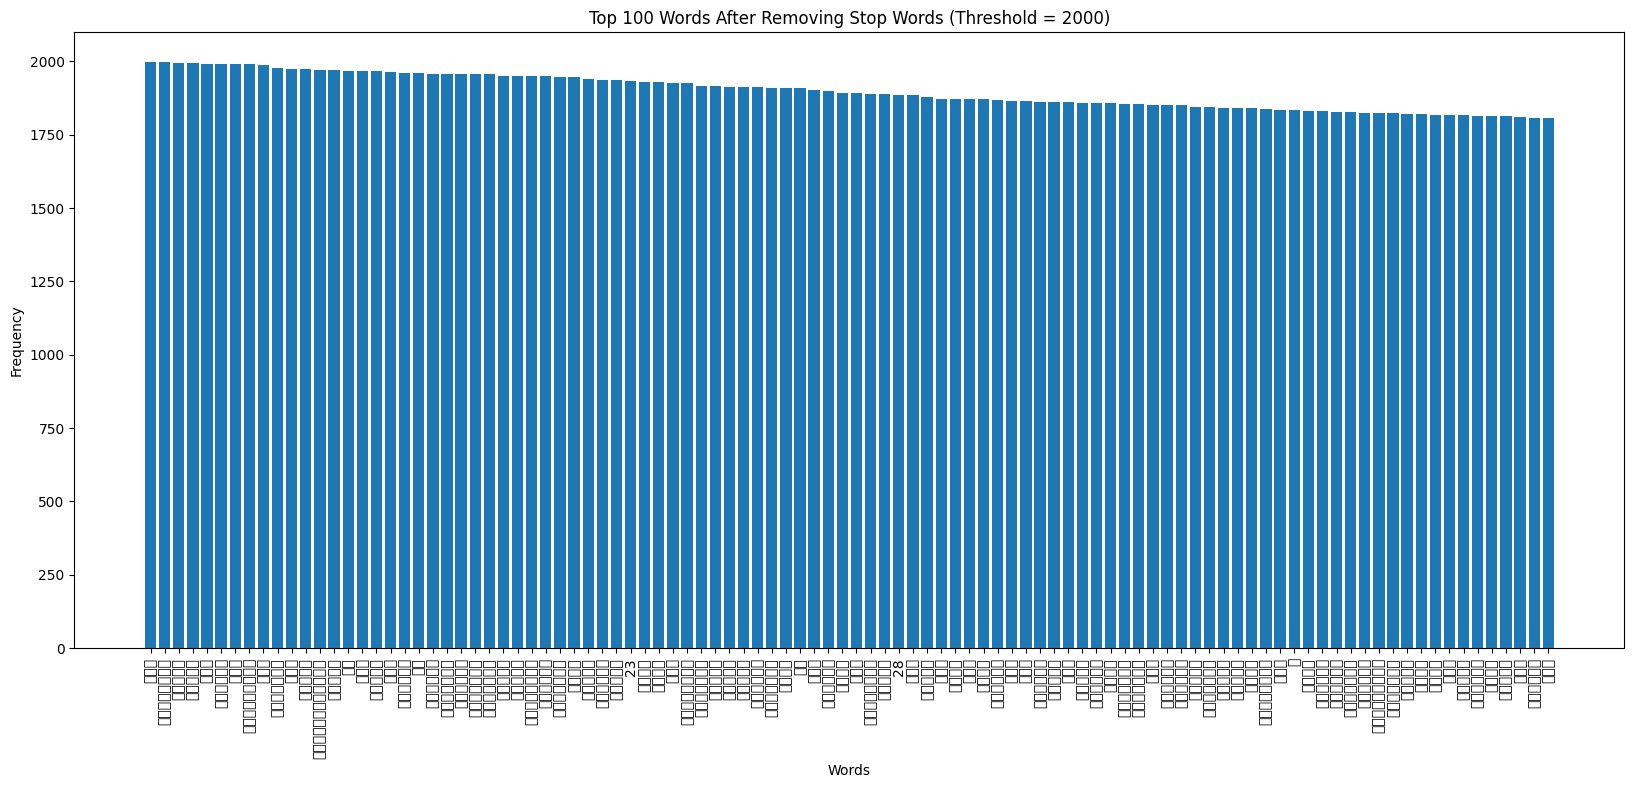

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2336 (\N{DEVANAGARI LETTER TTHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2339 (\N{DEVANAGARI LETTER NNA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2338 (\N{DEVANAGARI LETTER DDHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


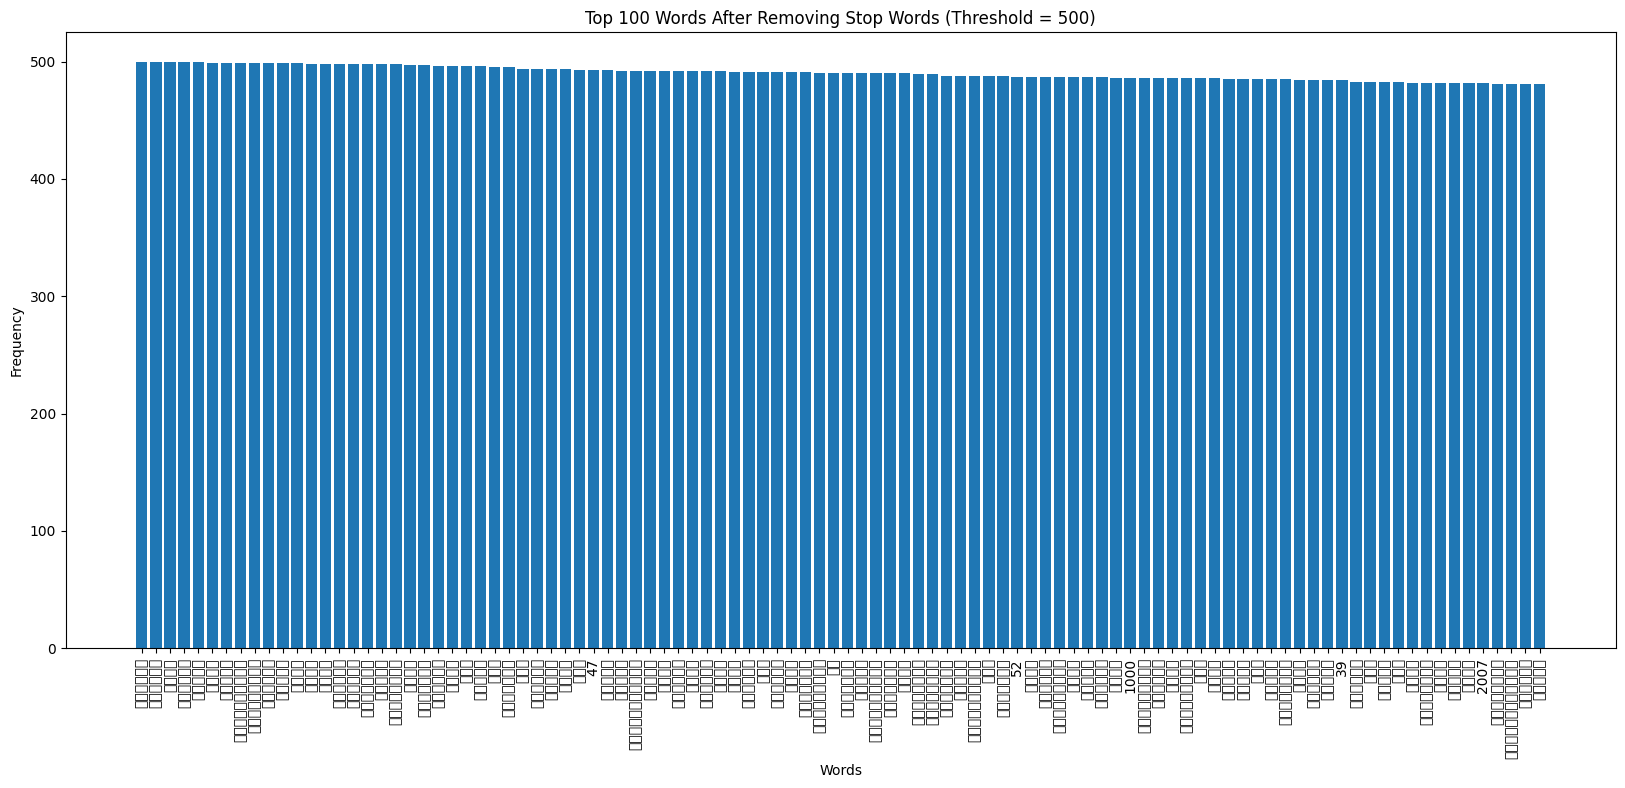

In [10]:
def filter_stop_words(word_freq, threshold):
    return {word: freq for word, freq in word_freq.items() if freq <= threshold}

# Try three thresholds
thresholds = [5000, 2000, 500]

for threshold in thresholds:
    filtered_freq = filter_stop_words(word_freq, threshold)
    sorted_filtered = sorted(filtered_freq.items(), key=lambda x: x[1], reverse=True)[:100]
    words, freqs = zip(*sorted_filtered)

    # Plot filtered graph
    plt.figure(figsize=(20, 8))
    plt.bar(words, freqs)
    plt.xticks(rotation=90)
    plt.title(f"Top 100 Words After Removing Stop Words (Threshold = {threshold})")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()